In [1]:
##importing regular expression
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Prerit Sharma.txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

2/26/23, 17:16 - Messages and calls are end-to-end encrypted No one outside of this chat, not even WhatsApp, can read or listen to them Tap to learn more
7/28/23, 16:24 - Messages and calls are end-to-end encrypted No one outside of this chat, not even WhatsApp, can read or listen to them Tap to learn more
9/7/23, 10:33 - Messages and calls are end-to-end encrypted No one outside of this chat, not even WhatsApp, can read or listen to them Tap to learn more
9/15/23, 15:53 - Messages and calls are end-to-end encrypted No one outside of this chat, not even WhatsApp, can read or listen to them Tap to learn more
9/21/23, 09:27 - 🎶Rhythm 🎶: Hey 
Rhythm this side
9/21/23, 09:28 - 🎶Rhythm 🎶: BNM class
Thursday, 21 Sept  •  09:01–10:01
Google Meet joining info
Video call link: https://meetgooglecom/jjh-wgks-iup
Or dial: +1 505-738-1225 PIN: 724 415 005#
9/21/23, 09:28 - 🎶Rhythm 🎶: Yeh meet join krle rajat ki id se
9/21/23, 09:35 - 🎶Rhythm 🎶: jb join krle btadio
9/21/23, 09:40 - Prerit Sharma: J

In [5]:
print(type(data))

<class 'str'>


In [6]:
##making the pattern out of date and time
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
# splitting the data into messages and date & time
messages = re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted No one outside of this chat, not even WhatsApp, can read or listen to them Tap to learn more\n',
 'Messages and calls are end-to-end encrypted No one outside of this chat, not even WhatsApp, can read or listen to them Tap to learn more\n',
 'Messages and calls are end-to-end encrypted No one outside of this chat, not even WhatsApp, can read or listen to them Tap to learn more\n',
 'Messages and calls are end-to-end encrypted No one outside of this chat, not even WhatsApp, can read or listen to them Tap to learn more\n',
 '🎶Rhythm 🎶: Hey \nRhythm this side\n',
 '🎶Rhythm 🎶: BNM class\nThursday, 21 Sept  •  09:01–10:01\nGoogle Meet joining info\nVideo call link: https://meetgooglecom/jjh-wgks-iup\nOr dial: +1 505-738-1225 PIN: 724 415 005#\n',
 '🎶Rhythm 🎶: Yeh meet join krle rajat ki id se\n',
 '🎶Rhythm 🎶: jb join krle btadio\n',
 'Prerit Sharma: Joined\n',
 'Prerit Sharma: Jab attendance ho to text kar diyo\n',
 '🎶Rhythm 🎶: okie\n',
 '🎶Rhythm

In [8]:
len(messages)

388

In [9]:
dates = re.findall(pattern,data)
dates
len(dates)

388

In [10]:
from datetime import datetime
# dividing the dataset into two columns messages and date 
df = pd.DataFrame({'user_message':messages,'message_date':dates})
# converting the message date data type
def parse_date(date_str):
    for fmt in ('%d/%m/%Y, %H:%M - ', '%m/%d/%y, %H:%M - '):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"Date format not recognized: {date_str}")

df['message_date'] = df['message_date'].apply(parse_date)
df.rename(columns={'message_date':'date'},inplace=True)
df.head()


,user_message,date
0,Messages and calls are end-to-end encrypted No...,2023-02-26 17:16:00
1,Messages and calls are end-to-end encrypted No...,2023-07-28 16:24:00
2,Messages and calls are end-to-end encrypted No...,2023-09-07 10:33:00
3,Messages and calls are end-to-end encrypted No...,2023-09-15 15:53:00
4,🎶Rhythm 🎶: Hey \nRhythm this side\n,2023-09-21 09:27:00


In [11]:
df.shape

(388, 2)

In [12]:
# separate users and messages 
users = []
messages = []
for message in df['user_message']:
    entry = re.split(r'([\w\W]*?):\s', message)
    if entry[1:]: # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['users'] = users
df['message'] = messages
df1 = df.drop(columns=['user_message'],inplace=True)

df.head(10)
        

,date,users,message
0,2023-02-26 17:16:00,group_notification,Messages and calls are end-to-end encrypted No...
1,2023-07-28 16:24:00,group_notification,Messages and calls are end-to-end encrypted No...
2,2023-09-07 10:33:00,group_notification,Messages and calls are end-to-end encrypted No...
3,2023-09-15 15:53:00,group_notification,Messages and calls are end-to-end encrypted No...
4,2023-09-21 09:27:00,🎶Rhythm 🎶,Hey \nRhythm this side\n
5,2023-09-21 09:28:00,🎶Rhythm 🎶,"BNM class\nThursday, 21 Sept • 09:01–10:01\..."
6,2023-09-21 09:28:00,🎶Rhythm 🎶,Yeh meet join krle rajat ki id se\n
7,2023-09-21 09:35:00,🎶Rhythm 🎶,jb join krle btadio\n
8,2023-09-21 09:40:00,Prerit Sharma,Joined\n
9,2023-09-21 09:40:00,Prerit Sharma,Jab attendance ho to text kar diyo\n


In [13]:
# extracting the year from date
df['year'] = df['date'].dt.year

In [14]:
df.head()

,date,users,message,year
0,2023-02-26 17:16:00,group_notification,Messages and calls are end-to-end encrypted No...,2023
1,2023-07-28 16:24:00,group_notification,Messages and calls are end-to-end encrypted No...,2023
2,2023-09-07 10:33:00,group_notification,Messages and calls are end-to-end encrypted No...,2023
3,2023-09-15 15:53:00,group_notification,Messages and calls are end-to-end encrypted No...,2023
4,2023-09-21 09:27:00,🎶Rhythm 🎶,Hey \nRhythm this side\n,2023


In [15]:
# extracting the month name
df['month'] = df['date'].dt.month_name()

In [16]:
df['day'] = df['date'].dt.day

In [17]:
df['hour']  =df['date'].dt.hour

In [18]:
df['minute']  =df['date'].dt.minute

In [19]:
df.head()

,date,users,message,year,month,day,hour,minute
0,2023-02-26 17:16:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,February,26,17,16
1,2023-07-28 16:24:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,July,28,16,24
2,2023-09-07 10:33:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,7,10,33
3,2023-09-15 15:53:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,15,15,53
4,2023-09-21 09:27:00,🎶Rhythm 🎶,Hey \nRhythm this side\n,2023,September,21,9,27


In [20]:
df[df['users']=="Prerit Sharma"].shape

(182, 8)

In [21]:
# number of words 
words = []
for message in df['message']:
    words.extend(message.split())
    

In [22]:
len(words)

2358

In [23]:
# !pip install URLExtract
# COunting the number of links shared in the chat
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's www.gmail.com have URL stackoverflow.com as a example google.com,http://facebook.com,ftp://url.in")
urls



['www.gmail.com', 'stackoverflow.com']

In [24]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [25]:
len(links)

0

In [26]:
df

,date,users,message,year,month,day,hour,minute
0,2023-02-26 17:16:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,February,26,17,16
1,2023-07-28 16:24:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,July,28,16,24
2,2023-09-07 10:33:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,7,10,33
3,2023-09-15 15:53:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,15,15,53
4,2023-09-21 09:27:00,🎶Rhythm 🎶,Hey \nRhythm this side\n,2023,September,21,9,27
...,...,...,...,...,...,...,...,...
383,2024-07-22 21:48:00,Prerit Sharma,Sherry Padhane mein No idea yaar\n,2024,July,22,21,48
384,2024-07-22 21:48:00,🎶Rhythm 🎶,Hmm mil gyaa\n,2024,July,22,21,48
385,2024-07-22 21:48:00,🎶Rhythm 🎶,ooohhh okie okie\n,2024,July,22,21,48
386,2024-07-26 20:18:00,🎶Rhythm 🎶,Best of luck ✨✨\n,2024,July,26,20,18


In [27]:
# counting the number of messages per user
x = df['users'].value_counts().head()

In [28]:
import matplotlib.pyplot as plt


In [29]:
name = x.index
count = x.values

C:\Users\sunil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


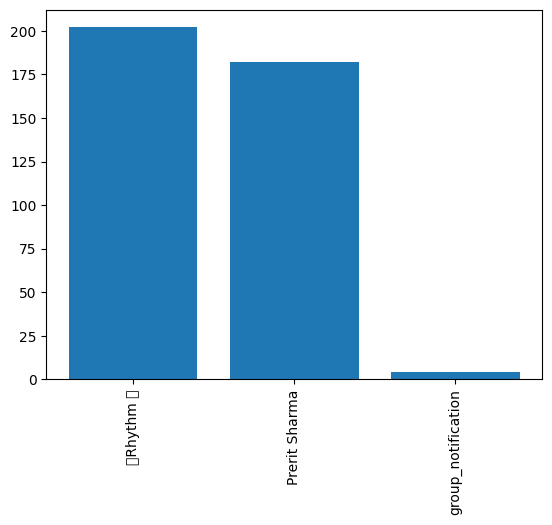

In [30]:
plt.bar(name,count)
plt.xticks(rotation = "vertical")
plt.show()

In [31]:
round((df['users'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'users':'Name','count':'Percent'})

,Name,Percent
0,🎶Rhythm 🎶,52.06
1,Prerit Sharma,46.91
2,group_notification,1.03


In [32]:
words = []
for message in df['message']:
    words.extend(message.split())
    
words
    

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them',
 'Tap',
 'to',
 'learn',
 'more',
 'Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them',
 'Tap',
 'to',
 'learn',
 'more',
 'Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them',
 'Tap',
 'to',
 'learn',
 'more',
 'Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them',
 'Tap',
 'to',
 'learn',
 'more',
 'Hey',
 'Rhythm',
 'this',
 'side',
 'BNM',
 'class

In [33]:
# top 20 words  
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

# Now all these words are basically stop words i.e they are used at the end of sentences
# but dont have a meaning

# soo we need to remove these

# Now we will be removing 
# ->Group Notifications
# ->Stop Words
# ->Media Omitted


,0,1
0,to,43
1,h,37
2,hai,37
3,se,22
4,m,20
5,and,18
6,ka,18
7,the,18
8,kya,18
9,ki,17


In [34]:
temp = df[df['users'] != "group_notification"]
temp = temp[temp['message'] != '<Media omitted>\n']

In [35]:
# now since the stop words are in hinglish
# we have imported a file were there are various stop
# words that are in hinglish

f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)


.
..
...
?
??
-
--
=
{
}
[
]
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
com

In [36]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)


   

In [37]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,yaar,13
1,rajat,12
2,okie,12
3,interview,10
4,call,9
5,👍🏻,9
6,join,8
7,attendance,8
8,message,8
9,mail,8


In [38]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [39]:
# importing emoji library for analysing emojis
import emoji

    

In [40]:
import emoji

# Initialize an empty list to hold the emojis
emojis = []

# Function to check if a character is an emoji
def is_emoji(character):
    return character in emoji.EMOJI_DATA

# Iterate over each message in the dataframe
for message in df['message']:
    # Extract emojis from each message
    emojis.extend([c for c in message if is_emoji(c)])

# Count the occurrences of each emoji
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))



,0,1
0,😂,30
1,🏻,16
2,👍,14
3,😊,7
4,🥲,5
5,🤞,5
6,🥹,4
7,✨,4
8,😁,2
9,🤣,2


In [41]:
# creating a new column and filling it with month number
df['month_num'] = df['date'].dt.month

In [42]:
df

,date,users,message,year,month,day,hour,minute,month_num
0,2023-02-26 17:16:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,February,26,17,16,2
1,2023-07-28 16:24:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,July,28,16,24,7
2,2023-09-07 10:33:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,7,10,33,9
3,2023-09-15 15:53:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,15,15,53,9
4,2023-09-21 09:27:00,🎶Rhythm 🎶,Hey \nRhythm this side\n,2023,September,21,9,27,9
...,...,...,...,...,...,...,...,...,...
383,2024-07-22 21:48:00,Prerit Sharma,Sherry Padhane mein No idea yaar\n,2024,July,22,21,48,7
384,2024-07-22 21:48:00,🎶Rhythm 🎶,Hmm mil gyaa\n,2024,July,22,21,48,7
385,2024-07-22 21:48:00,🎶Rhythm 🎶,ooohhh okie okie\n,2024,July,22,21,48,7
386,2024-07-26 20:18:00,🎶Rhythm 🎶,Best of luck ✨✨\n,2024,July,26,20,18,7


In [43]:
# grouping the data on the basis of year and month
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [44]:
timeline

,year,month_num,month,message
0,2023,2,February,1
1,2023,7,July,1
2,2023,9,September,97
3,2023,10,October,7
4,2024,1,January,19
5,2024,2,February,27
6,2024,3,March,14
7,2024,4,April,59
8,2024,5,May,15
9,2024,7,July,148


In [45]:
# creating a new column storing the month and year 

time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))
    
    

In [46]:
timeline['time'] = time

In [47]:
timeline
# now this will help in generating a plot where x axis is time and y axis denotes number of messages

,year,month_num,month,message,time
0,2023,2,February,1,February-2023
1,2023,7,July,1,July-2023
2,2023,9,September,97,September-2023
3,2023,10,October,7,October-2023
4,2024,1,January,19,January-2024
5,2024,2,February,27,February-2024
6,2024,3,March,14,March-2024
7,2024,4,April,59,April-2024
8,2024,5,May,15,May-2024
9,2024,7,July,148,July-2024


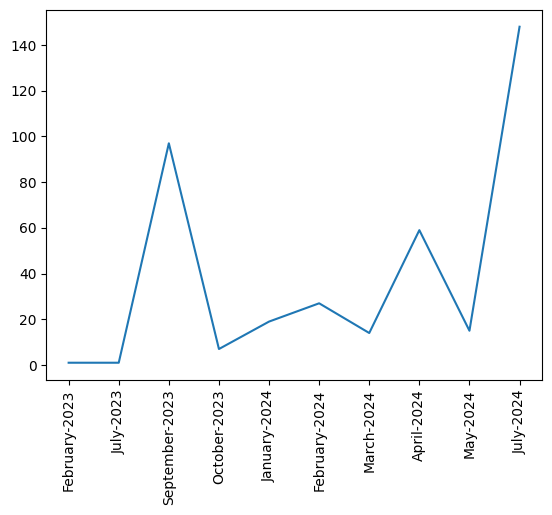

In [48]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation = "vertical")
plt.show()

In [49]:
# creating a new column which stores the date only
df['only_date'] = df['date'].dt.date
df

,date,users,message,year,month,day,hour,minute,month_num,only_date
0,2023-02-26 17:16:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,February,26,17,16,2,2023-02-26
1,2023-07-28 16:24:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,July,28,16,24,7,2023-07-28
2,2023-09-07 10:33:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,7,10,33,9,2023-09-07
3,2023-09-15 15:53:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,15,15,53,9,2023-09-15
4,2023-09-21 09:27:00,🎶Rhythm 🎶,Hey \nRhythm this side\n,2023,September,21,9,27,9,2023-09-21
...,...,...,...,...,...,...,...,...,...,...
383,2024-07-22 21:48:00,Prerit Sharma,Sherry Padhane mein No idea yaar\n,2024,July,22,21,48,7,2024-07-22
384,2024-07-22 21:48:00,🎶Rhythm 🎶,Hmm mil gyaa\n,2024,July,22,21,48,7,2024-07-22
385,2024-07-22 21:48:00,🎶Rhythm 🎶,ooohhh okie okie\n,2024,July,22,21,48,7,2024-07-22
386,2024-07-26 20:18:00,🎶Rhythm 🎶,Best of luck ✨✨\n,2024,July,26,20,18,7,2024-07-26


In [50]:
# grouping the data
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
daily_timeline

,only_date,message
0,2023-02-26,1
1,2023-07-28,1
2,2023-09-07,1
3,2023-09-15,1
4,2023-09-21,88
5,2023-09-24,7
6,2023-10-06,7
7,2024-01-29,19
8,2024-02-09,4
9,2024-02-10,2


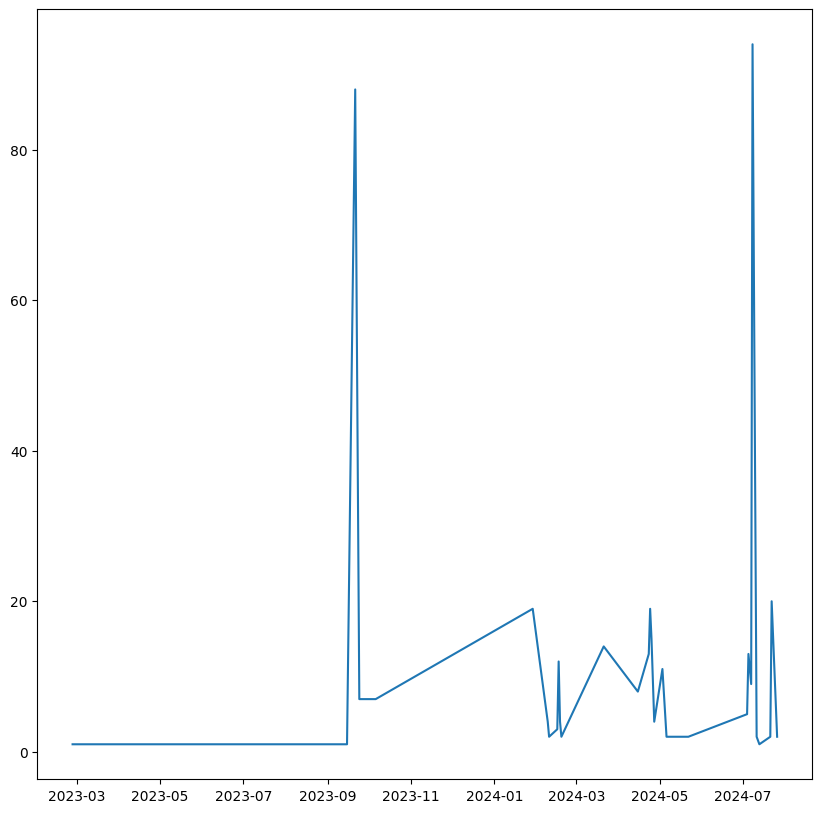

In [51]:
plt.figure(figsize=(10,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [52]:
df['day_name'] = df['date'].dt.day_name()

In [53]:
df['day_name'].value_counts()

day_name
Monday       145
Thursday     125
Friday        42
Sunday        23
Wednesday     21
Saturday      19
Tuesday       13
Name: count, dtype: int64

In [54]:
# heat map

period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [55]:
period

['17-18',
 '16-17',
 '10-11',
 '15-16',
 '9-10',
 '9-10',
 '9-10',
 '9-10',
 '9-10',
 '9-10',
 '9-10',
 '9-10',
 '9-10',
 '9-10',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '10-11',
 '11-12',
 '11-12',
 '11-12',
 '11-12',
 '11-12',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '13-14',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '17-18',
 '17-18',
 '17-18',
 '17-18',
 '17-18',
 '17-18',
 '17-18',
 '9-10',
 '9-10',
 '

In [56]:
df.head()

,date,users,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2023-02-26 17:16:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,February,26,17,16,2,2023-02-26,Sunday
1,2023-07-28 16:24:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,July,28,16,24,7,2023-07-28,Friday
2,2023-09-07 10:33:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,7,10,33,9,2023-09-07,Thursday
3,2023-09-15 15:53:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,15,15,53,9,2023-09-15,Friday
4,2023-09-21 09:27:00,🎶Rhythm 🎶,Hey \nRhythm this side\n,2023,September,21,9,27,9,2023-09-21,Thursday


In [57]:
df["period"] = period

In [58]:
df

,date,users,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2023-02-26 17:16:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,February,26,17,16,2,2023-02-26,Sunday,17-18
1,2023-07-28 16:24:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,July,28,16,24,7,2023-07-28,Friday,16-17
2,2023-09-07 10:33:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,7,10,33,9,2023-09-07,Thursday,10-11
3,2023-09-15 15:53:00,group_notification,Messages and calls are end-to-end encrypted No...,2023,September,15,15,53,9,2023-09-15,Friday,15-16
4,2023-09-21 09:27:00,🎶Rhythm 🎶,Hey \nRhythm this side\n,2023,September,21,9,27,9,2023-09-21,Thursday,9-10
...,...,...,...,...,...,...,...,...,...,...,...,...
383,2024-07-22 21:48:00,Prerit Sharma,Sherry Padhane mein No idea yaar\n,2024,July,22,21,48,7,2024-07-22,Monday,21-22
384,2024-07-22 21:48:00,🎶Rhythm 🎶,Hmm mil gyaa\n,2024,July,22,21,48,7,2024-07-22,Monday,21-22
385,2024-07-22 21:48:00,🎶Rhythm 🎶,ooohhh okie okie\n,2024,July,22,21,48,7,2024-07-22,Monday,21-22
386,2024-07-26 20:18:00,🎶Rhythm 🎶,Best of luck ✨✨\n,2024,July,26,20,18,7,2024-07-26,Friday,20-21


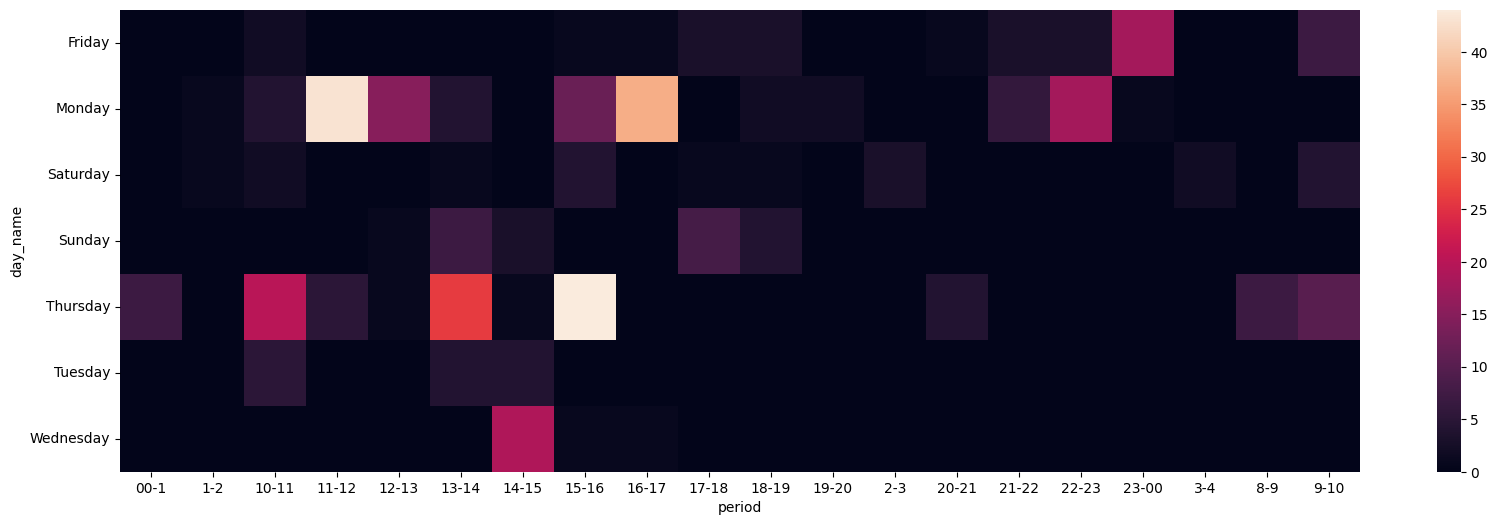

In [59]:
import seaborn as sns
plt.figure(figsize = (20,6))
# creating a pivot table with x axis as day name , y axis as period , value as number of messages 
# filling the places where there are no messages as 0
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation = "horizontal")
plt.show()

In [60]:
# pivot table 
df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,2-3,20-21,21-22,22-23,23-00,3-4,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,
Friday,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,0.0,1.0,3.0,3.0,18.0,0.0,0.0,7.0
Monday,0.0,1.0,4.0,43.0,15.0,4.0,0.0,12.0,37.0,0.0,2.0,2.0,0.0,0.0,6.0,18.0,1.0,0.0,0.0,0.0
Saturday,0.0,1.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
Sunday,0.0,0.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thursday,7.0,0.0,20.0,5.0,1.0,26.0,1.0,44.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,10.0
Tuesday,0.0,0.0,5.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
